In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)

In [3]:
# Filtro por Paises selecionados para a Análise
countries = ['Brazil', 'United States', 'Germany']
df_filtered = df[df['location'].isin(countries)]

In [4]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

<ipython-input-4-180e06356630>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])


In [5]:
# Estilo
sns.set_theme(style='darkgrid', palette='bright', font_scale=1.1)

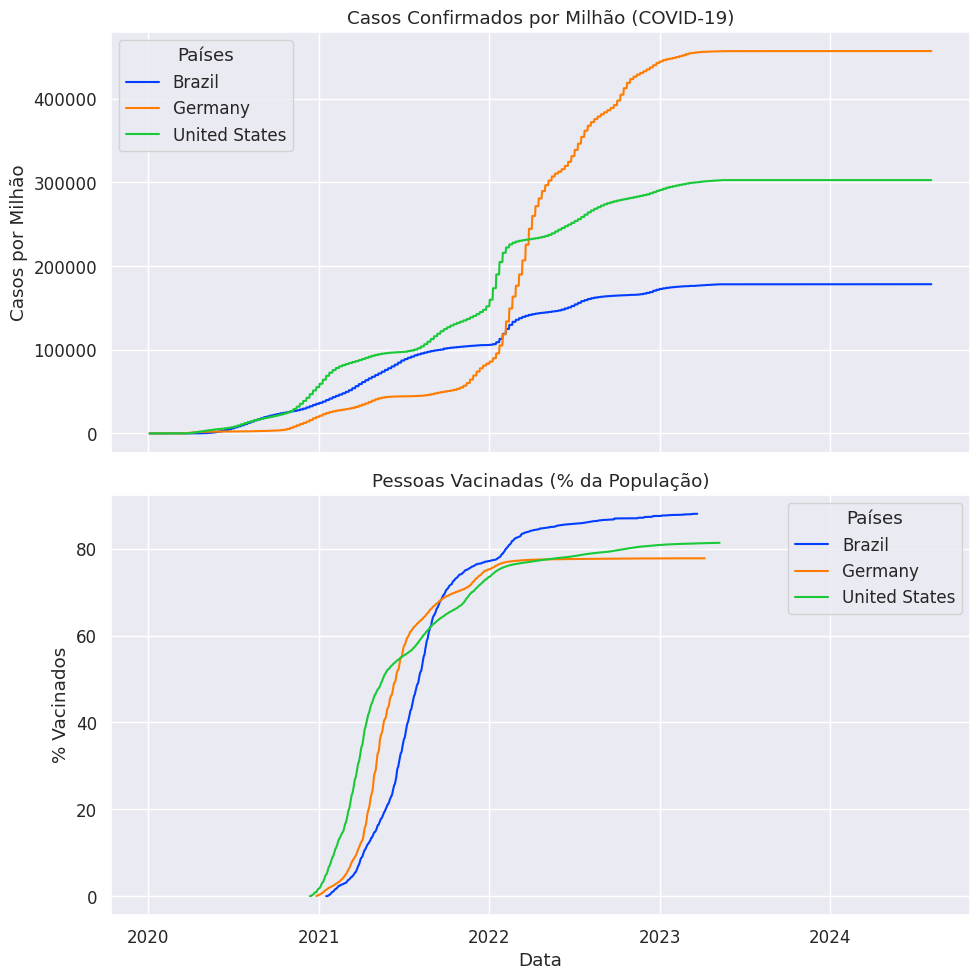

In [6]:
# Subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# 1º Gráfico: Casos Confirmados por Milhão
sns.lineplot(ax=axes[0], x='date', y='total_cases_per_million', data=df_filtered, hue='location')
axes[0].set_title('Casos Confirmados por Milhão (COVID-19)')
axes[0].set_ylabel('Casos por Milhão')
axes[0].legend(title='Países')

# 2º Gráfico: % de Vacinação
sns.lineplot(ax=axes[1], x='date', y='people_vaccinated_per_hundred', data=df_filtered, hue='location')
axes[1].set_title('Pessoas Vacinadas (% da População)')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('% Vacinados')
axes[1].legend(title='Países')

plt.tight_layout()
plt.show()

In [7]:
# Data limite para visualização
fim_periodo = pd.to_datetime('2022-06-30')

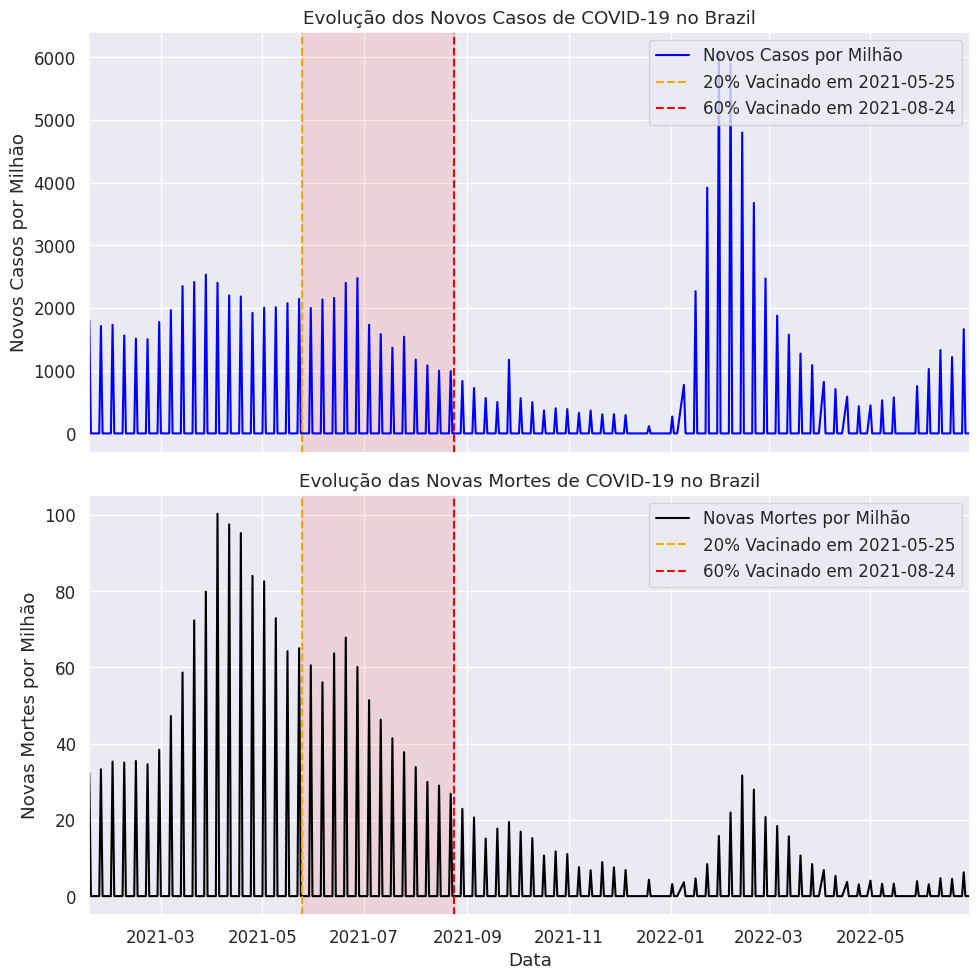

In [8]:
country = 'Brazil'

# Filtro dos dados do país
df_country = df_filtered[df_filtered['location'] == country].dropna(subset=['people_vaccinated_per_hundred'])

# Datas de vacinação
vac_20 = df_country[df_country['people_vaccinated_per_hundred'] >= 20].iloc[0]['date']
vac_60 = df_country[df_country['people_vaccinated_per_hundred'] >= 60].iloc[0]['date']

# Criar subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# 1º Plot: Novos Casos
sns.lineplot(ax=axes[0], x='date', y='new_cases_per_million', data=df_country, label='Novos Casos por Milhão', color='blue')

axes[0].axvline(x=vac_20, color='orange', linestyle='--', label=f'20% Vacinado em {vac_20.date()}')
axes[0].axvline(x=vac_60, color='red', linestyle='--', label=f'60% Vacinado em {vac_60.date()}')
axes[0].axvspan(vac_20, vac_60, color='red', alpha=0.1)

axes[0].set_title(f'Evolução dos Novos Casos de COVID-19 no {country}')
axes[0].set_ylabel('Novos Casos por Milhão')
axes[0].legend(loc='upper right')
axes[0].grid(True)

# 2º Plot: Novas Mortes
axes[1].plot(df_country['date'], df_country['new_deaths_per_million'], label='Novas Mortes por Milhão', color='black')

axes[1].axvline(x=vac_20, color='orange', linestyle='--', label=f'20% Vacinado em {vac_20.date()}')
axes[1].axvline(x=vac_60, color='red', linestyle='--', label=f'60% Vacinado em {vac_60.date()}')
axes[1].axvspan(vac_20, vac_60, color='red', alpha=0.1)

axes[1].set_title(f'Evolução das Novas Mortes de COVID-19 no {country}')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Novas Mortes por Milhão')
axes[1].legend(loc='upper right')
axes[1].grid(True)

# Limitar datas
axes[1].set_xlim(df_country['date'].min(), fim_periodo)

plt.tight_layout()
plt.show()

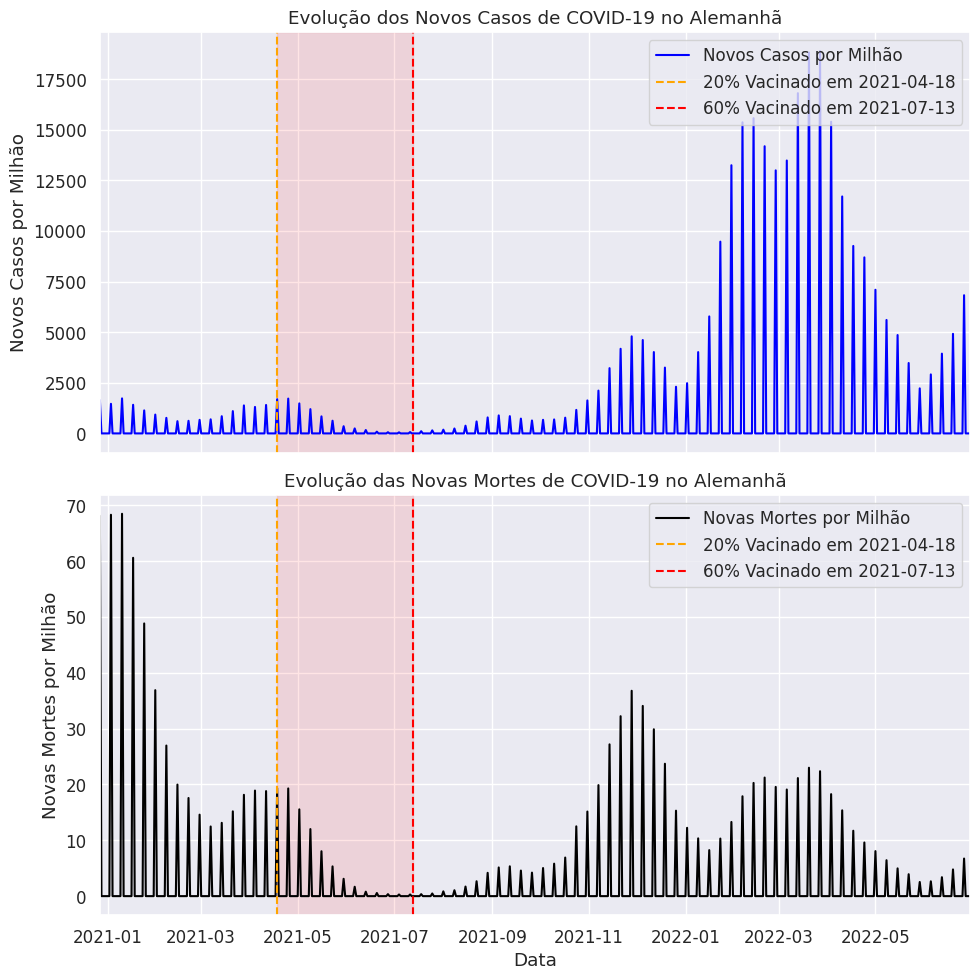

In [9]:
country = 'Germany'

# Filtro dos dados do país
df_country = df_filtered[df_filtered['location'] == country].dropna(subset=['people_vaccinated_per_hundred'])

# Datas de vacinação
vac_20 = df_country[df_country['people_vaccinated_per_hundred'] >= 20].iloc[0]['date']
vac_60 = df_country[df_country['people_vaccinated_per_hundred'] >= 60].iloc[0]['date']

# Criar subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# 1º Plot: Novos Casos
sns.lineplot(ax=axes[0], x='date', y='new_cases_per_million', data=df_country, label='Novos Casos por Milhão', color='blue')

axes[0].axvline(x=vac_20, color='orange', linestyle='--', label=f'20% Vacinado em {vac_20.date()}')
axes[0].axvline(x=vac_60, color='red', linestyle='--', label=f'60% Vacinado em {vac_60.date()}')
axes[0].axvspan(vac_20, vac_60, color='red', alpha=0.1)

axes[0].set_title(f'Evolução dos Novos Casos de COVID-19 no Alemanhã')
axes[0].set_ylabel('Novos Casos por Milhão')
axes[0].legend(loc='upper right')
axes[0].grid(True)

# 2º Plot: Novas Mortes
axes[1].plot(df_country['date'], df_country['new_deaths_per_million'], label='Novas Mortes por Milhão', color='black')

axes[1].axvline(x=vac_20, color='orange', linestyle='--', label=f'20% Vacinado em {vac_20.date()}')
axes[1].axvline(x=vac_60, color='red', linestyle='--', label=f'60% Vacinado em {vac_60.date()}')
axes[1].axvspan(vac_20, vac_60, color='red', alpha=0.1)

axes[1].set_title(f'Evolução das Novas Mortes de COVID-19 no Alemanhã')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Novas Mortes por Milhão')
axes[1].legend(loc='upper right')
axes[1].grid(True)

# Limitar datas
axes[1].set_xlim(df_country['date'].min(), fim_periodo)

plt.tight_layout()
plt.show()

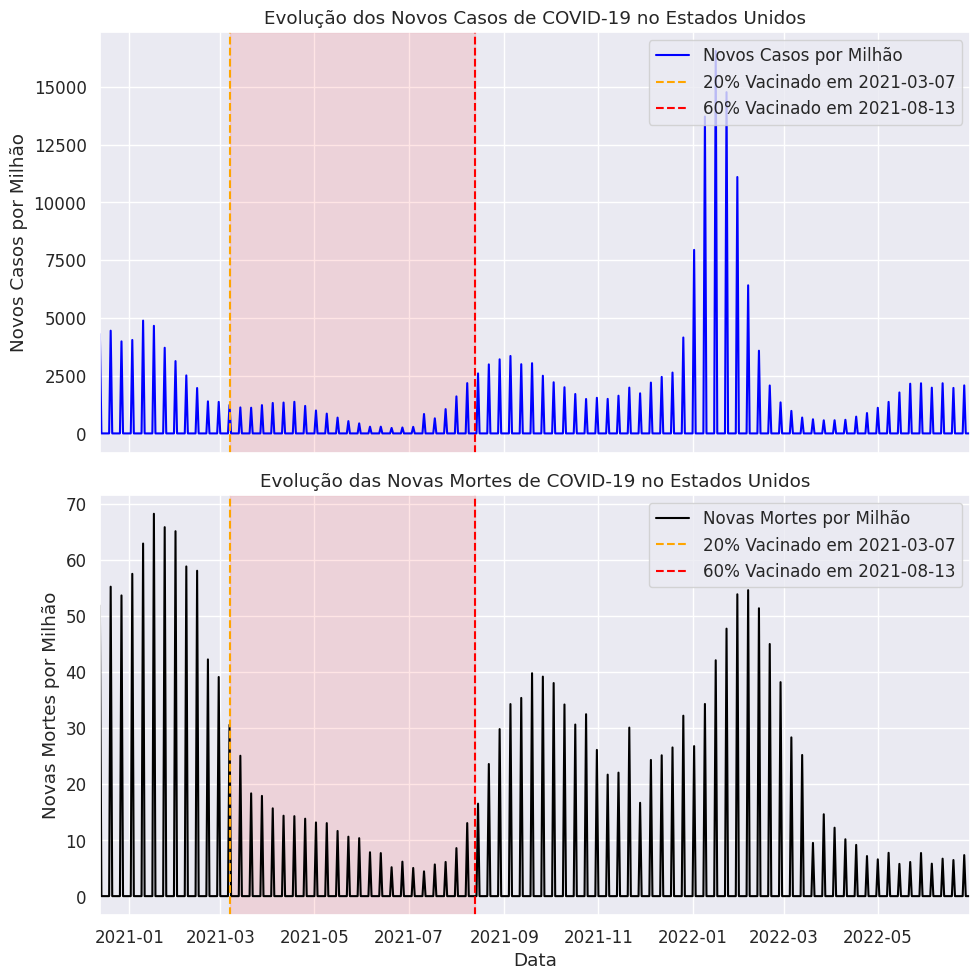

In [10]:
country = 'United States'

# Filtro dos dados do país
df_country = df_filtered[df_filtered['location'] == country].dropna(subset=['people_vaccinated_per_hundred'])

# Datas de vacinação
vac_20 = df_country[df_country['people_vaccinated_per_hundred'] >= 20].iloc[0]['date']
vac_60 = df_country[df_country['people_vaccinated_per_hundred'] >= 60].iloc[0]['date']

# Criar subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# 1º Plot: Novos Casos
sns.lineplot(ax=axes[0], x='date', y='new_cases_per_million', data=df_country, label='Novos Casos por Milhão', color='blue')

axes[0].axvline(x=vac_20, color='orange', linestyle='--', label=f'20% Vacinado em {vac_20.date()}')
axes[0].axvline(x=vac_60, color='red', linestyle='--', label=f'60% Vacinado em {vac_60.date()}')
axes[0].axvspan(vac_20, vac_60, color='red', alpha=0.1)

axes[0].set_title(f'Evolução dos Novos Casos de COVID-19 no Estados Unidos')
axes[0].set_ylabel('Novos Casos por Milhão')
axes[0].legend(loc='upper right')
axes[0].grid(True)

# 2º Plot: Novas Mortes
axes[1].plot(df_country['date'], df_country['new_deaths_per_million'], label='Novas Mortes por Milhão', color='black')

axes[1].axvline(x=vac_20, color='orange', linestyle='--', label=f'20% Vacinado em {vac_20.date()}')
axes[1].axvline(x=vac_60, color='red', linestyle='--', label=f'60% Vacinado em {vac_60.date()}')
axes[1].axvspan(vac_20, vac_60, color='red', alpha=0.1)

axes[1].set_title(f'Evolução das Novas Mortes de COVID-19 no Estados Unidos')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Novas Mortes por Milhão')
axes[1].legend(loc='upper right')
axes[1].grid(True)

# Limitar datas
axes[1].set_xlim(df_country['date'].min(), fim_periodo)

plt.tight_layout()
plt.show()